In [22]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os


import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load topology results

In [23]:
file_name = "High_School11"
file_name = "LH10"
file_name = "InVS13"

In [24]:
labels = ["density","global clu","avg short","metric p","metric n","assortat","s metric","duration",
         "hour_closeness" "hour_betweenness" "W hour_betweenness","nb_connected_components","hour_modularity"]
def load_topo_res(file_name,ks = ["3"]):
    
    res = dict()
    #for k in :
    for k in ks:
        tmp = np.load("../variation_of_K_res/"+file_name+"/topology_res/"+file_name+"-"+str(k)+".npy")
        a = np.load("../variation_of_K_res/"+file_name+"/topology_res/"+file_name+"-2-"+str(k)+".npy")
        new_tmp = []
        # sto rimovendo Freq interact , edge strength, hour clust e hour ass
        c = 0
        for i in tmp:
            if c == 7:
                aa = 0
            elif c == 8:
                aa = 0
            else:
                new_tmp.append(i)
            c = c + 1
            
        for i in a:
            if c == 15:
                aa = 0
            elif c == 16:
                aa = 0
            else:
                new_tmp.append(i)
            c = c + 1
        res[k]=new_tmp
        
    return res

def load_topo_distributions(generator,file_name):
    
    den = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/density.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    new_conv = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/new_con.npy",allow_pickle=True)
    durat = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/dur.npy",allow_pickle=True)
    clust = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/clust.npy",allow_pickle=True)
    #s_met = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/s_metric.npy",allow_pickle=True)
    ass = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/ass.npy",allow_pickle=True)
    #asp = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/asp.npy",allow_pickle=True)
    hclose = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/hclose.npy",allow_pickle=True)
    hbet = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/hbet.npy",allow_pickle=True)
    whbet = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/whbet.npy",allow_pickle=True)
    conncomp = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/conncomp.npy",allow_pickle=True)
    hmod = np.load("topology_results/topology_results_giulia/"+generator+"/Multiple_run/distributions/"+file_name+"/hmod.npy",allow_pickle=True)
    
    hs_met = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/hs_metric.npy",allow_pickle=True)
    hasp = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/hasp.npy",allow_pickle=True)
    #nb_inter = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    #stren = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/streng.npy",allow_pickle=True 

    #return den,inter_indiv,new_conv,durat,clust,ass,hclose,hbet,whbet,conncomp,hmod,hs_met,hasp
    #return den,inter_indiv,new_conv,durat,clust,ass,conncomp,hclose,hbet,whbet,hmod,hs_met,hasp
    return hasp,ass,clust,whbet,hbet,hclose,durat,hmod,hs_met,new_conv,inter_indiv,den,conncomp


def load_topo_original(file_name):
    den = np.load("topology_results/original_distributions/"+file_name+"/density.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/original_distributions/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    new_conv = np.load("topology_results/original_distributions/"+file_name+"/new_con.npy",allow_pickle=True)
    durat = np.load("topology_results/original_distributions/"+file_name+"/dur.npy",allow_pickle=True)
    clust = np.load("topology_results/original_distributions/"+file_name+"/clust.npy",allow_pickle=True)
    #s_met = np.load("topology_results/original_distributions/"+file_name+"/s_metric.npy",allow_pickle=True)
    ass = np.load("topology_results/original_distributions/"+file_name+"/ass.npy",allow_pickle=True)
    #asp = np.load("topology_results/original_distributions/"+file_name+"/asp.npy",allow_pickle=True)
    hclose = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/hclose.npy",allow_pickle=True)
    hbet = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/hbet.npy",allow_pickle=True)
    whbet = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/whbet.npy",allow_pickle=True)
    conncomp = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/conncomp.npy",allow_pickle=True)
    hmod = np.load("topology_results/topology_results_giulia/original_distributions/"+file_name+"/hmod.npy",allow_pickle=True)
    
    hs_met = np.load("topology_results/original_distributions/"+file_name+"/hs_metric.npy",allow_pickle=True)
    hasp = np.load("topology_results/original_distributions/"+file_name+"/hasp.npy",allow_pickle=True)
    #stren = np.load("topology_results/original_distributions/"+file_name+"/streng.npy",allow_pickle=True)
    #nb_inter = np.load("topology_results/original_distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    
    #return den,inter_indiv,new_conv,durat,clust,ass,[conncomp],[hclose],[hbet],[whbet],[hmod],[hs_met],[hasp]=True)
    
    return [hasp],ass,clust,[whbet],[hbet],[hclose],durat,[hmod],[hs_met],new_conv,inter_indiv,den,[conncomp]



def compute_counts(ro,e):
    counts = []
    e = np.array(e)
    for i in range(len(ro)-1):
        r1 = ro[i]
        r2 = ro[i+1]
        ee = e[e>r1]
        count = ee[ee<=r2]
        counts.append(len(count))
    return counts

def compute_multpile_counts(ranges,ee):
    counts = []
    for e in ee:
        counts.append(compute_counts(ranges,e))
    return counts

# example of calculating the kl divergence between two mass functions
from math import log2
from scipy.stats import wasserstein_distance as em
from scipy.stats import ks_2samp


def comp_stat(ori,competitor,dist,names):
    res = dict()
    c = 0
    for met in competitor:
        tmp = []
        for comp in met:
            if dist == "js":
                val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
            elif dist == "kl":
                val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
            elif dist == "em":
                val = em(ori[c][0],comp)
            elif dist == "ks":
                val = (ks_2samp(ori[c][0],comp)[0])
                
            tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res

In [25]:
file_name = "LH10"
o_in = load_topo_original(file_name)
t_in = load_topo_distributions("taggen",file_name)
d_in = load_topo_distributions("dymgen",file_name)
s_in = load_topo_distributions("stmgen",file_name)

In [26]:
pos = -1

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal

In [27]:
names = ["Density","Interacting\nindividuals","New conversations","Duration of contacts","Global clustering \ncoefficient",
         "Assortativity","Nb connected \ncomponents","Hour \ncloseness","Hour \nbetweenness","Weighted hour \nbetweenness",
         "Hour \nmodularity","Hour \nS-metric","Hour average shortest\npath length"]

names = ["Hour average shortest\npath length",
         "Hour \nassortativity",
         "Hour clustering \ncoefficient",
         "Weighted hour \nbetweenness",
         "Hour \nbetweenness",
         "Hour \ncloseness",
         "Duration of contacts",
         "Hour \nmodularity",
         "Hour \nS-metric",
         "New conversations",
         "Interacting\nindividuals",
         "Density",
         "Nb connected \ncomponents"]

In [28]:


def load_comp_metric(file_name,dist="ks"):
    o_in = load_topo_original(file_name)
    res = load_topo_res(file_name)
    den,gcc,asp,intind,newc,ass,strn,dur,hclo,hbet,whbet,nbconcom,mod =res["3"]
    
    t_in = load_topo_distributions("taggen",file_name)
    d_in = load_topo_distributions("dymgen",file_name)
    s_in = load_topo_distributions("stmgen",file_name)

    res_d = comp_stat(o_in,d_in,dist= dist,names=names)
    res_s = comp_stat(o_in,s_in,dist= dist,names=names)
    res_t = comp_stat(o_in,t_in,dist= dist,names=names)

    #x1 = np.array([list(den),list(gcc),list(asp),list(intind),list(newc),list(ass),list(strn),list(dur),list(hclo),
     #    list(hbet),list(whbet),list(nbconcom),list(mod)])
    
    x1 = np.array([list(den),list(intind),list(newc),list(dur),list(gcc),list(strn),list(ass),
                   list(asp), list(hclo),list(hbet),list(whbet),list(nbconcom),list(mod)])
    x2 = np.array(list(res_s.values()))
    x3 = np.array(list(res_t.values()))
    x4 = np.array(list(res_d.values()))
    idx = [12, 5, 4,9,8,7,3,10,11,2,1,0,6]
    
    return x1[idx],x2[idx],x3[idx],x4[idx]

In [29]:
dist = "ks"
x1h,x2h,x3h,x4h = load_comp_metric("LH10",dist=dist)
x1w,x2w,x3w,x4w = load_comp_metric("InVS13",dist=dist)
x1s,x2s,x3s,x4s = load_comp_metric("High_School11",dist=dist)

In [30]:
a = [["den",1],
     ["int ind",2],
     ["new conv",3],
     ["dur",4],
     ["GCC",5],
     ["ass",6],
     ["nbcomp",7],
     ["hclo",8],
     ["hbet",9],
     ["whbet",10],
     ["hmod",11],
     ["hsme",12],
     ["haspl",13],
    ]

a = np.array(a)

#[hasp],[ass],[clust],[whbet],[hbet],[hclose],durat,[hmod],[hs_met],new_conv,inter_indiv,den,[conncomp]
idx = [12, 5, 4,9,8,7,3,10,11,2,1,0,6]
x1h[idx]

array([[2.99882017e-01, 7.19303343e-26],
       [1.18206455e-01, 3.30583236e-05],
       [5.72916667e-01, 6.81509655e-15],
       [1.46843759e-01, 2.15675439e-07],
       [1.16177256e-01, 2.86696023e-07],
       [1.35416667e-01, 3.43593760e-01],
       [8.33333333e-02, 8.95187664e-01],
       [1.20382818e-01, 8.85835812e-08],
       [1.47083938e-01, 2.08169885e-11],
       [4.03892987e-01, 3.83626314e-85],
       [1.79799480e-01, 7.33009538e-17],
       [4.56617647e-01, 2.64851546e-08],
       [9.96147072e-02, 1.81089711e-06]])

/tmp/ipykernel_8467/591972983.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(names)
/tmp/ipykernel_8467/591972983.py:94: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


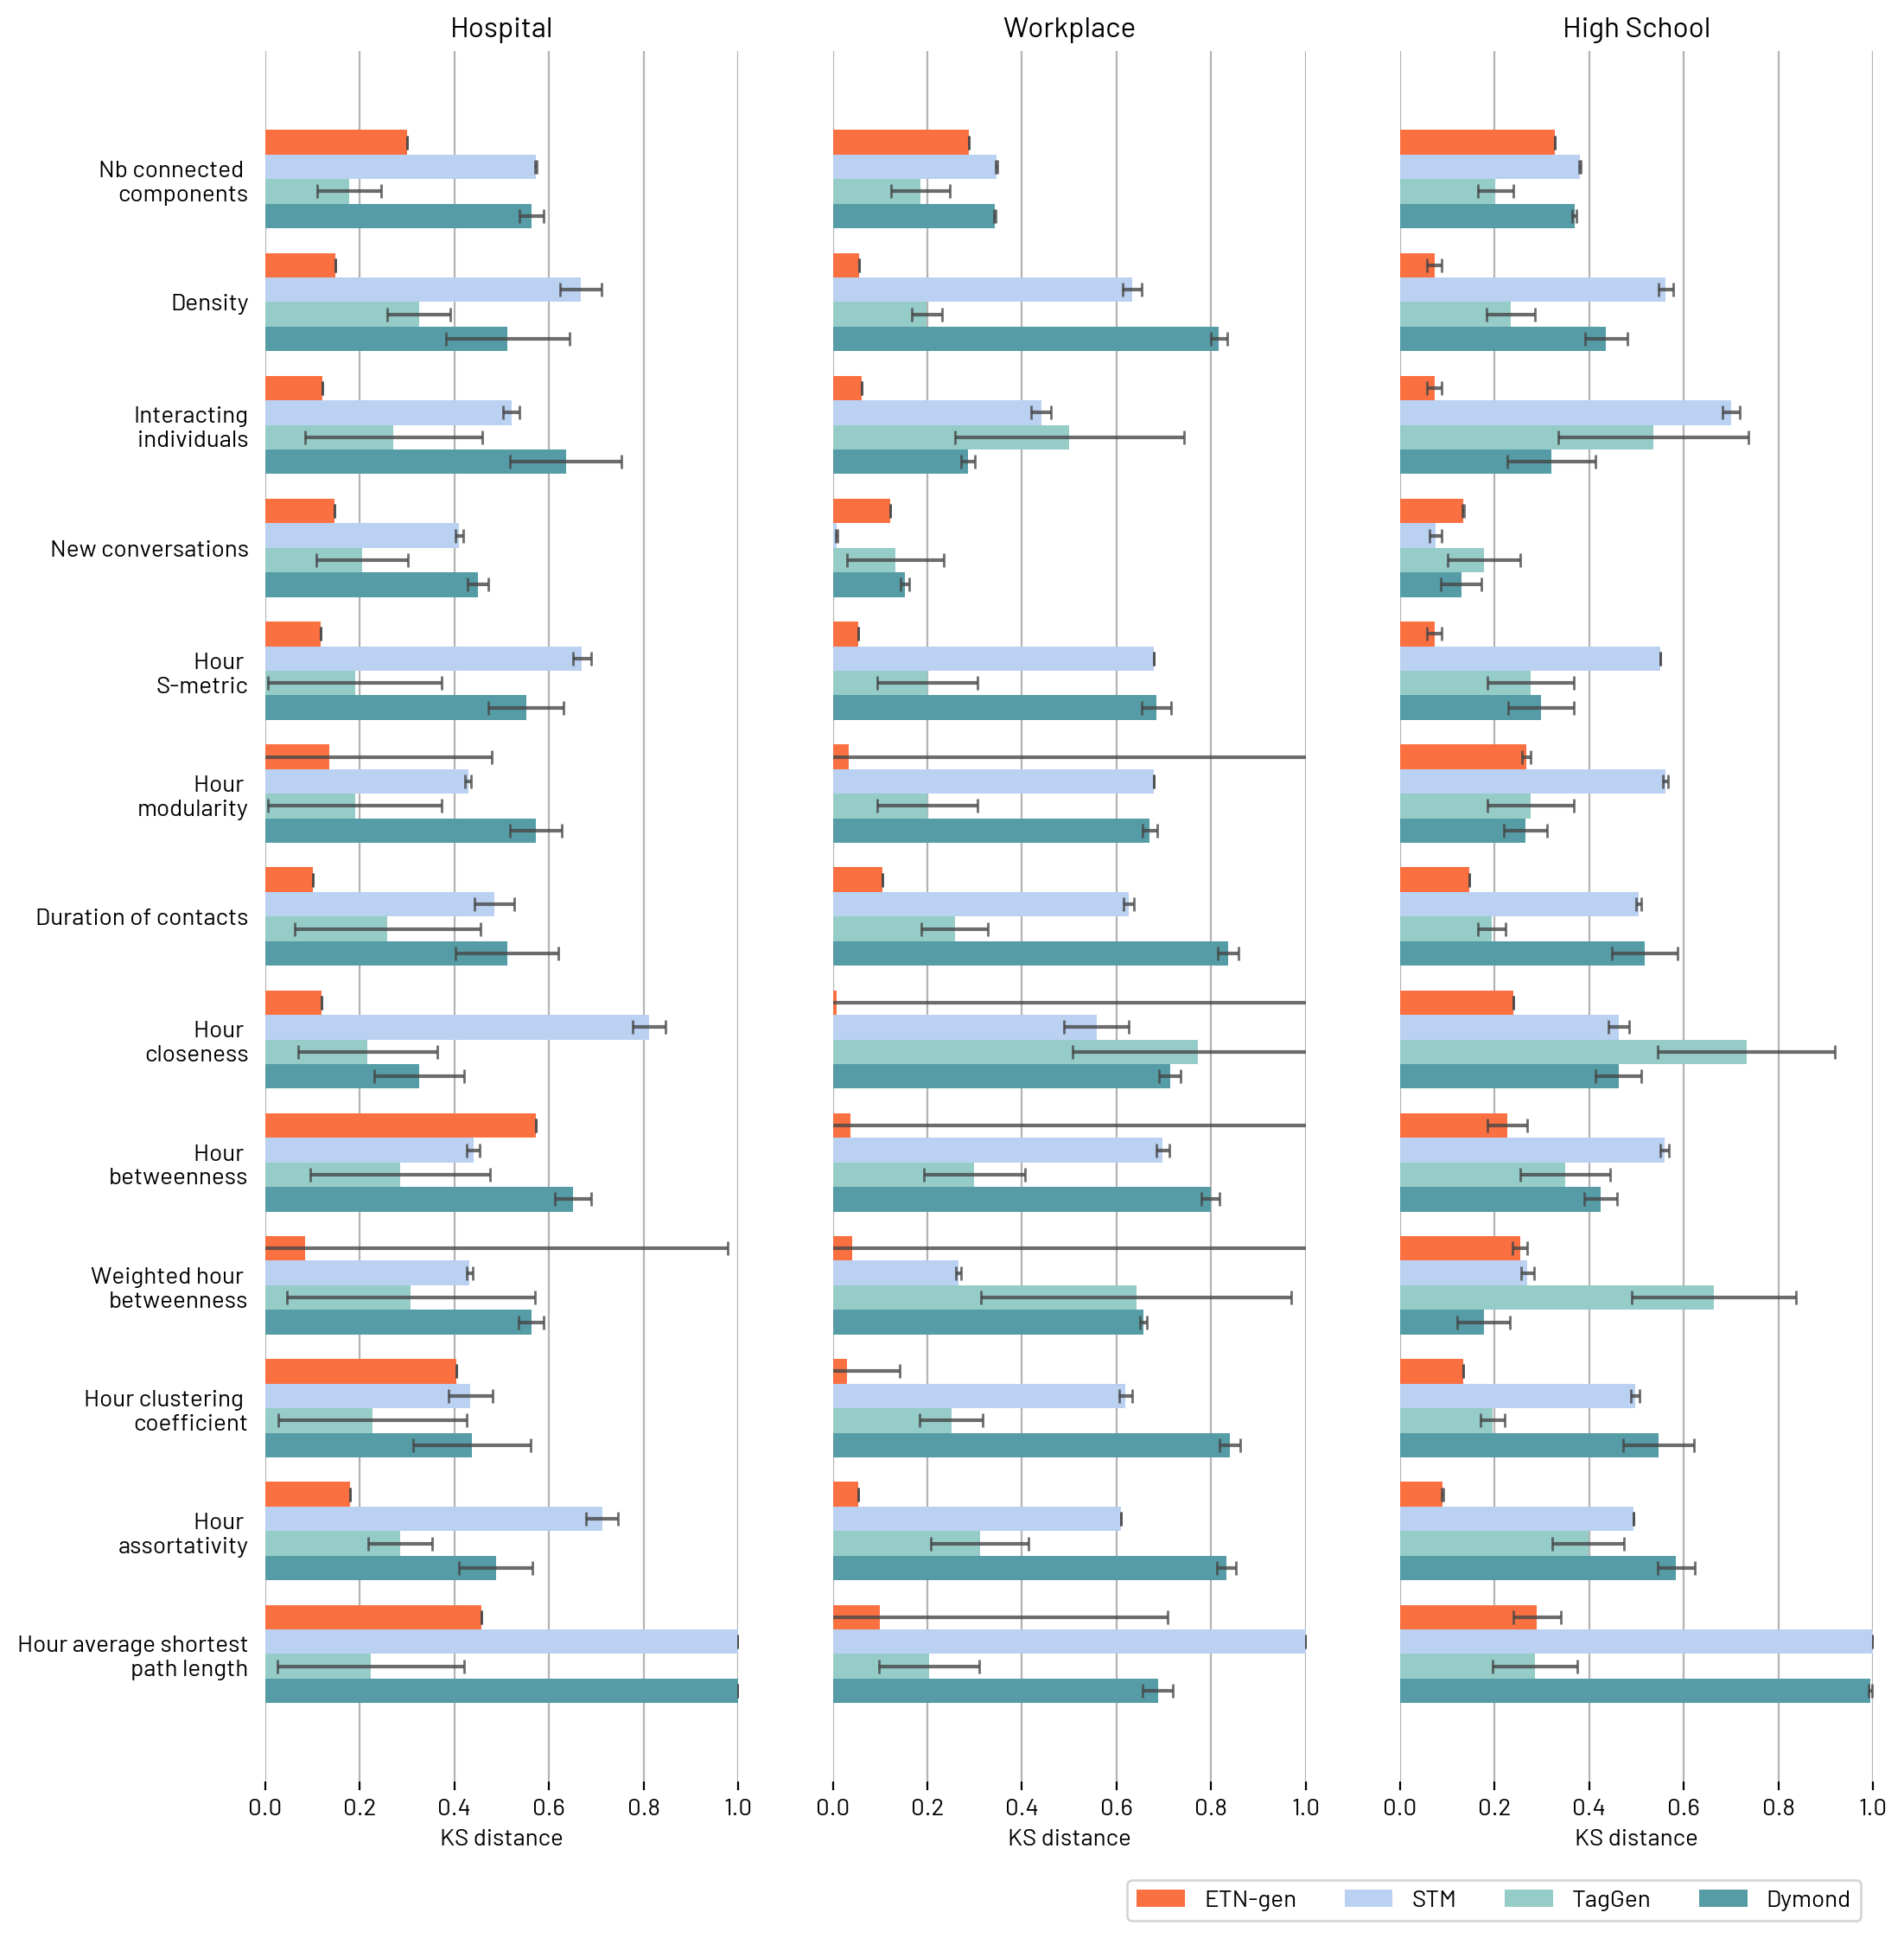

In [31]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal
error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

x = np.arange(13)
width = 0.2


fig, ax = plt.subplots(1,3,figsize=(12,13))

ax[0].title.set_text("Hospital")
ax[0].barh(x + 0.3, x1h[:,0], width, xerr=x1h[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[0].barh(x + 0.1, x2h[:,0], width, xerr=x2h[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.1, x3h[:,0], width, xerr=x3h[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[0].barh(x - 0.3, x4h[:,0], width, xerr=x4h[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)

ax[0].set_yticklabels(names)
ax[0].set_yticks(x)


ax[1].title.set_text("Workplace")
ax[1].barh(x + 0.3, x1w[:,0], width, xerr=x1w[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[1].barh(x + 0.1, x2w[:,0], width, xerr=x2w[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.1, x3w[:,0], width, xerr=x3w[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[1].barh(x - 0.3, x4w[:,0], width, xerr=x4w[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[2].title.set_text("High School")
ax[2].barh(x + 0.3, x1s[:,0], width, xerr=x1s[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
ax[2].barh(x + 0.1, x2s[:,0], width, xerr=x2s[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.1, x3s[:,0], width, xerr=x3s[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
ax[2].barh(x - 0.3, x4s[:,0], width, xerr=x4s[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(xmin=0)

ax[2].set_yticks(x)
ax[2].set_xlim(xmin=0)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "," "," "," "],rotation=0)



ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(3.4, -0.05))

ax[0].set_xlabel("KS distance")
ax[1].set_xlabel("KS distance")
ax[2].set_xlabel("KS distance")

ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)
ax[2].set_xlim(0,1)

fig.tight_layout()
#plt.savefig("COM_PHY_new_fig/topology_ks_3.pdf", bbox_inches = 'tight')
plt.show()

NameError: name 'res' is not defined

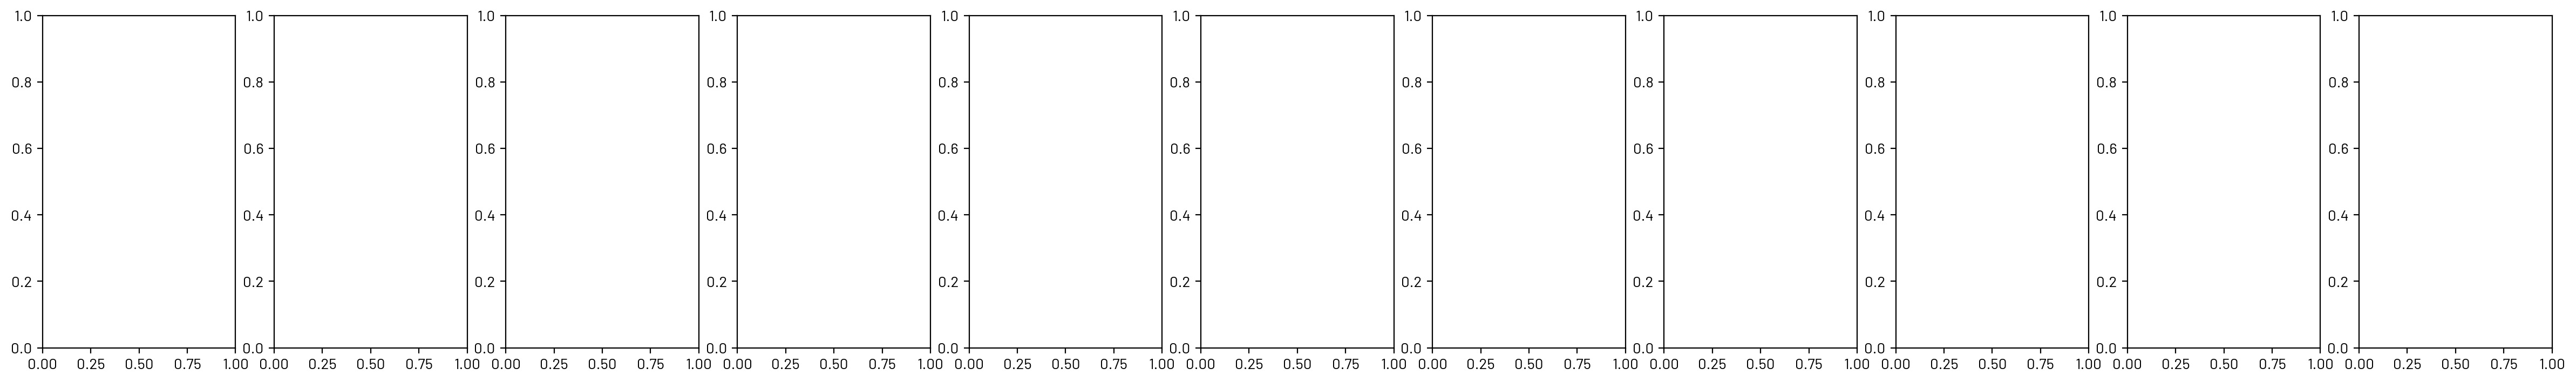

In [32]:
fig, ax = plt.subplots(1,11,figsize=(30,4))
for i in range(len(labels)):
    tmp = [v[i][0] for k,v in res.items()]
    x = np.arange(len(tmp))
    ax[i].set_title(labels[i])
    ax[i].bar(x,tmp)
    ax[i].set_xticks(x,ks)
    ax[i].set_xlabel("k")
    
#plt.savefig("varing_k_invs13.pdf")

In [33]:
line_width = 1.5


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


In [34]:
labels = ["Density",
          "Global clustering \ncoefficient",
          "Average shortest\npath length",
          "Interacting\nindividuals",
          "New conversations",
          "Assortativity",
          "S-metric",        
          "Frequency of\ninteractions",
          "Edge strength",
          "Duration of contacts",
          "hour_closeness",
          "hour_betweenness",
          "W hour_betweenness",
          "nb_connected_components",
          "hour_modularity",
          "hour_clustering",
          "hour_assort"]

labels = ["Density",
          "Global clustering \ncoefficient",
          "Average shortest\npath length",
          "Interacting\nindividuals",
          "New conversations",
          "Assortativity",
          #"S-metric",        
          #"Frequency of\ninteractions",
          "Edge strength",
          "Duration of contacts",
          "Hour closeness",
          "Hour betweenness",
          "Weight Hour\nbetweenness",
          "Nb connected\ncomponents",
          "Hour modularity"]#,
          #"hour_clustering",
          #"hour_assort"]

labels = labels

In [35]:
X = []
for i in range(len(labels)):
    tmp = [v[i][0] for k,v in res.items()]
    X.append(tmp)
X = np.transpose(X)

NameError: name 'res' is not defined

IndexError: list index out of range

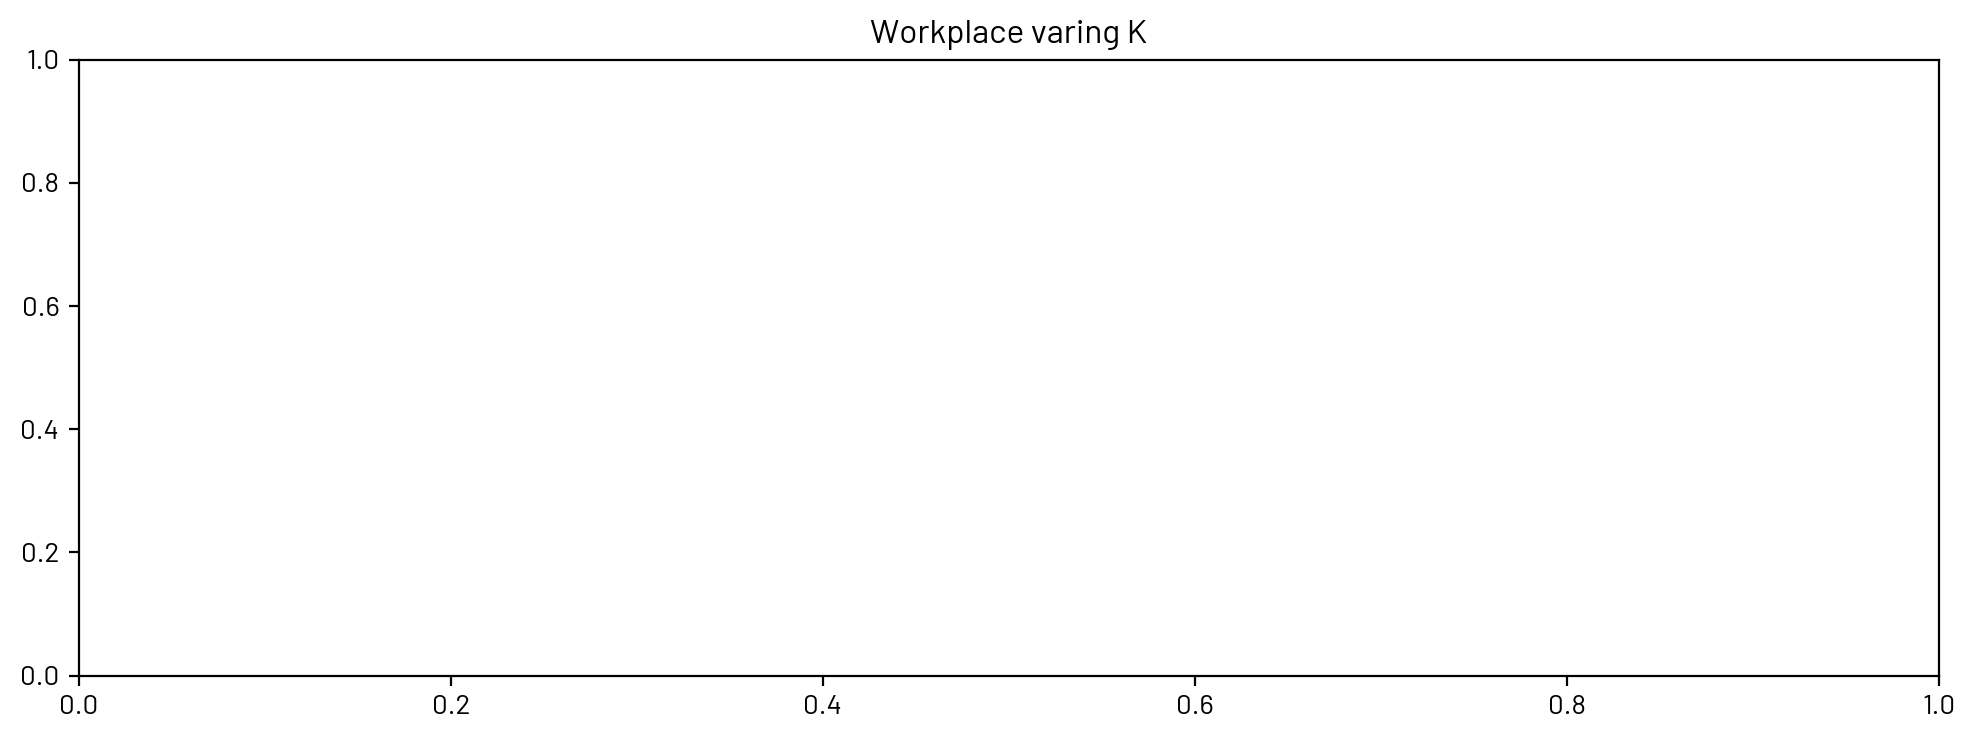

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars


fig, ax = plt.subplots(1,1,figsize=(12,4))

if file_name == "InVS13":
    ax.title.set_text("Workplace varing K")
if file_name == "LH10":
    ax.title.set_text("Hospital varing K")
if file_name == "High_School11":
    ax.title.set_text("High school varing K")
    
rects1 = ax.bar(x - 0.2, X[0], width,color="#fc8e69",label="k = 1")
rects2 = ax.bar(x - 0.1, X[1], width,color="#fb7041",label="k = 2")
rects3 = ax.bar(x - 0, X[2], width,color="#fa551e",label="k = 3")
rects4 = ax.bar(x + 0.1, X[3], width,color="#e13c05",label="k = 4")
rects4 = ax.bar(x + 0.2, X[4], width,color="#af2e04",label="k = 5")
#rects4 = ax.bar(x + 0.25, X[5], width,color="#7d2103",label="k = 50")

ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
#ax.set_ylim(0,1)
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.tick_params(bottom=False, right=False,left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.legend(loc='upper right',ncol = 1,bbox_to_anchor=(1.07, 1))

ax.tick_params(bottom=True, right=False,left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#b3b3b3')
ax.xaxis.grid(False)
ax.set_ylabel("KS distance")
fig.tight_layout()
#§plt.savefig("../variation_of_K_res/"+file_name+"/topology_varing_K_"+file_name+".pdf", bbox_inches = 'tight')
plt.show()

# figure nel tempo

In [20]:
file_name = "High_School11"

ORIGINAL_COLOR = '#474747' #dark grey


def load_varing_k(file_name):

    ks = [1,2,3,4,5]
    graphs = dict()

    for i in ks:
        file_name_in = "ETNgen-"+file_name+"-k-"+str(i)
        graphs[i] = load_ETNgen_graph(file_name_in,file_name)

    orig_graph = load_origin_graph(file_name)
    
    return orig_graph,graphs

In [21]:
orig_graph_hs,graphs_hs = load_varing_k("High_School11")
orig_graph_lh,graphs_lh = load_varing_k("LH10")
orig_graph_in,graphs_in = load_varing_k("InVS13")

NameError: name 'load_ETNgen_graph' is not defined

In [109]:
import numpy as np
def nb_interactions(graphs):
    res = []
    for g in graphs:
        res.append(len(g.edges()))
    return(res)
def moving_average(x, w=8):
    return np.convolve(x, np.ones(w), 'valid') / w

In [110]:

n = len(orig_graph_in)
x = np.arange(0,n,int((n/12)))
x

array([   0,  274,  548,  822, 1096, 1370, 1644, 1918, 2192, 2466, 2740,
       3014, 3288])

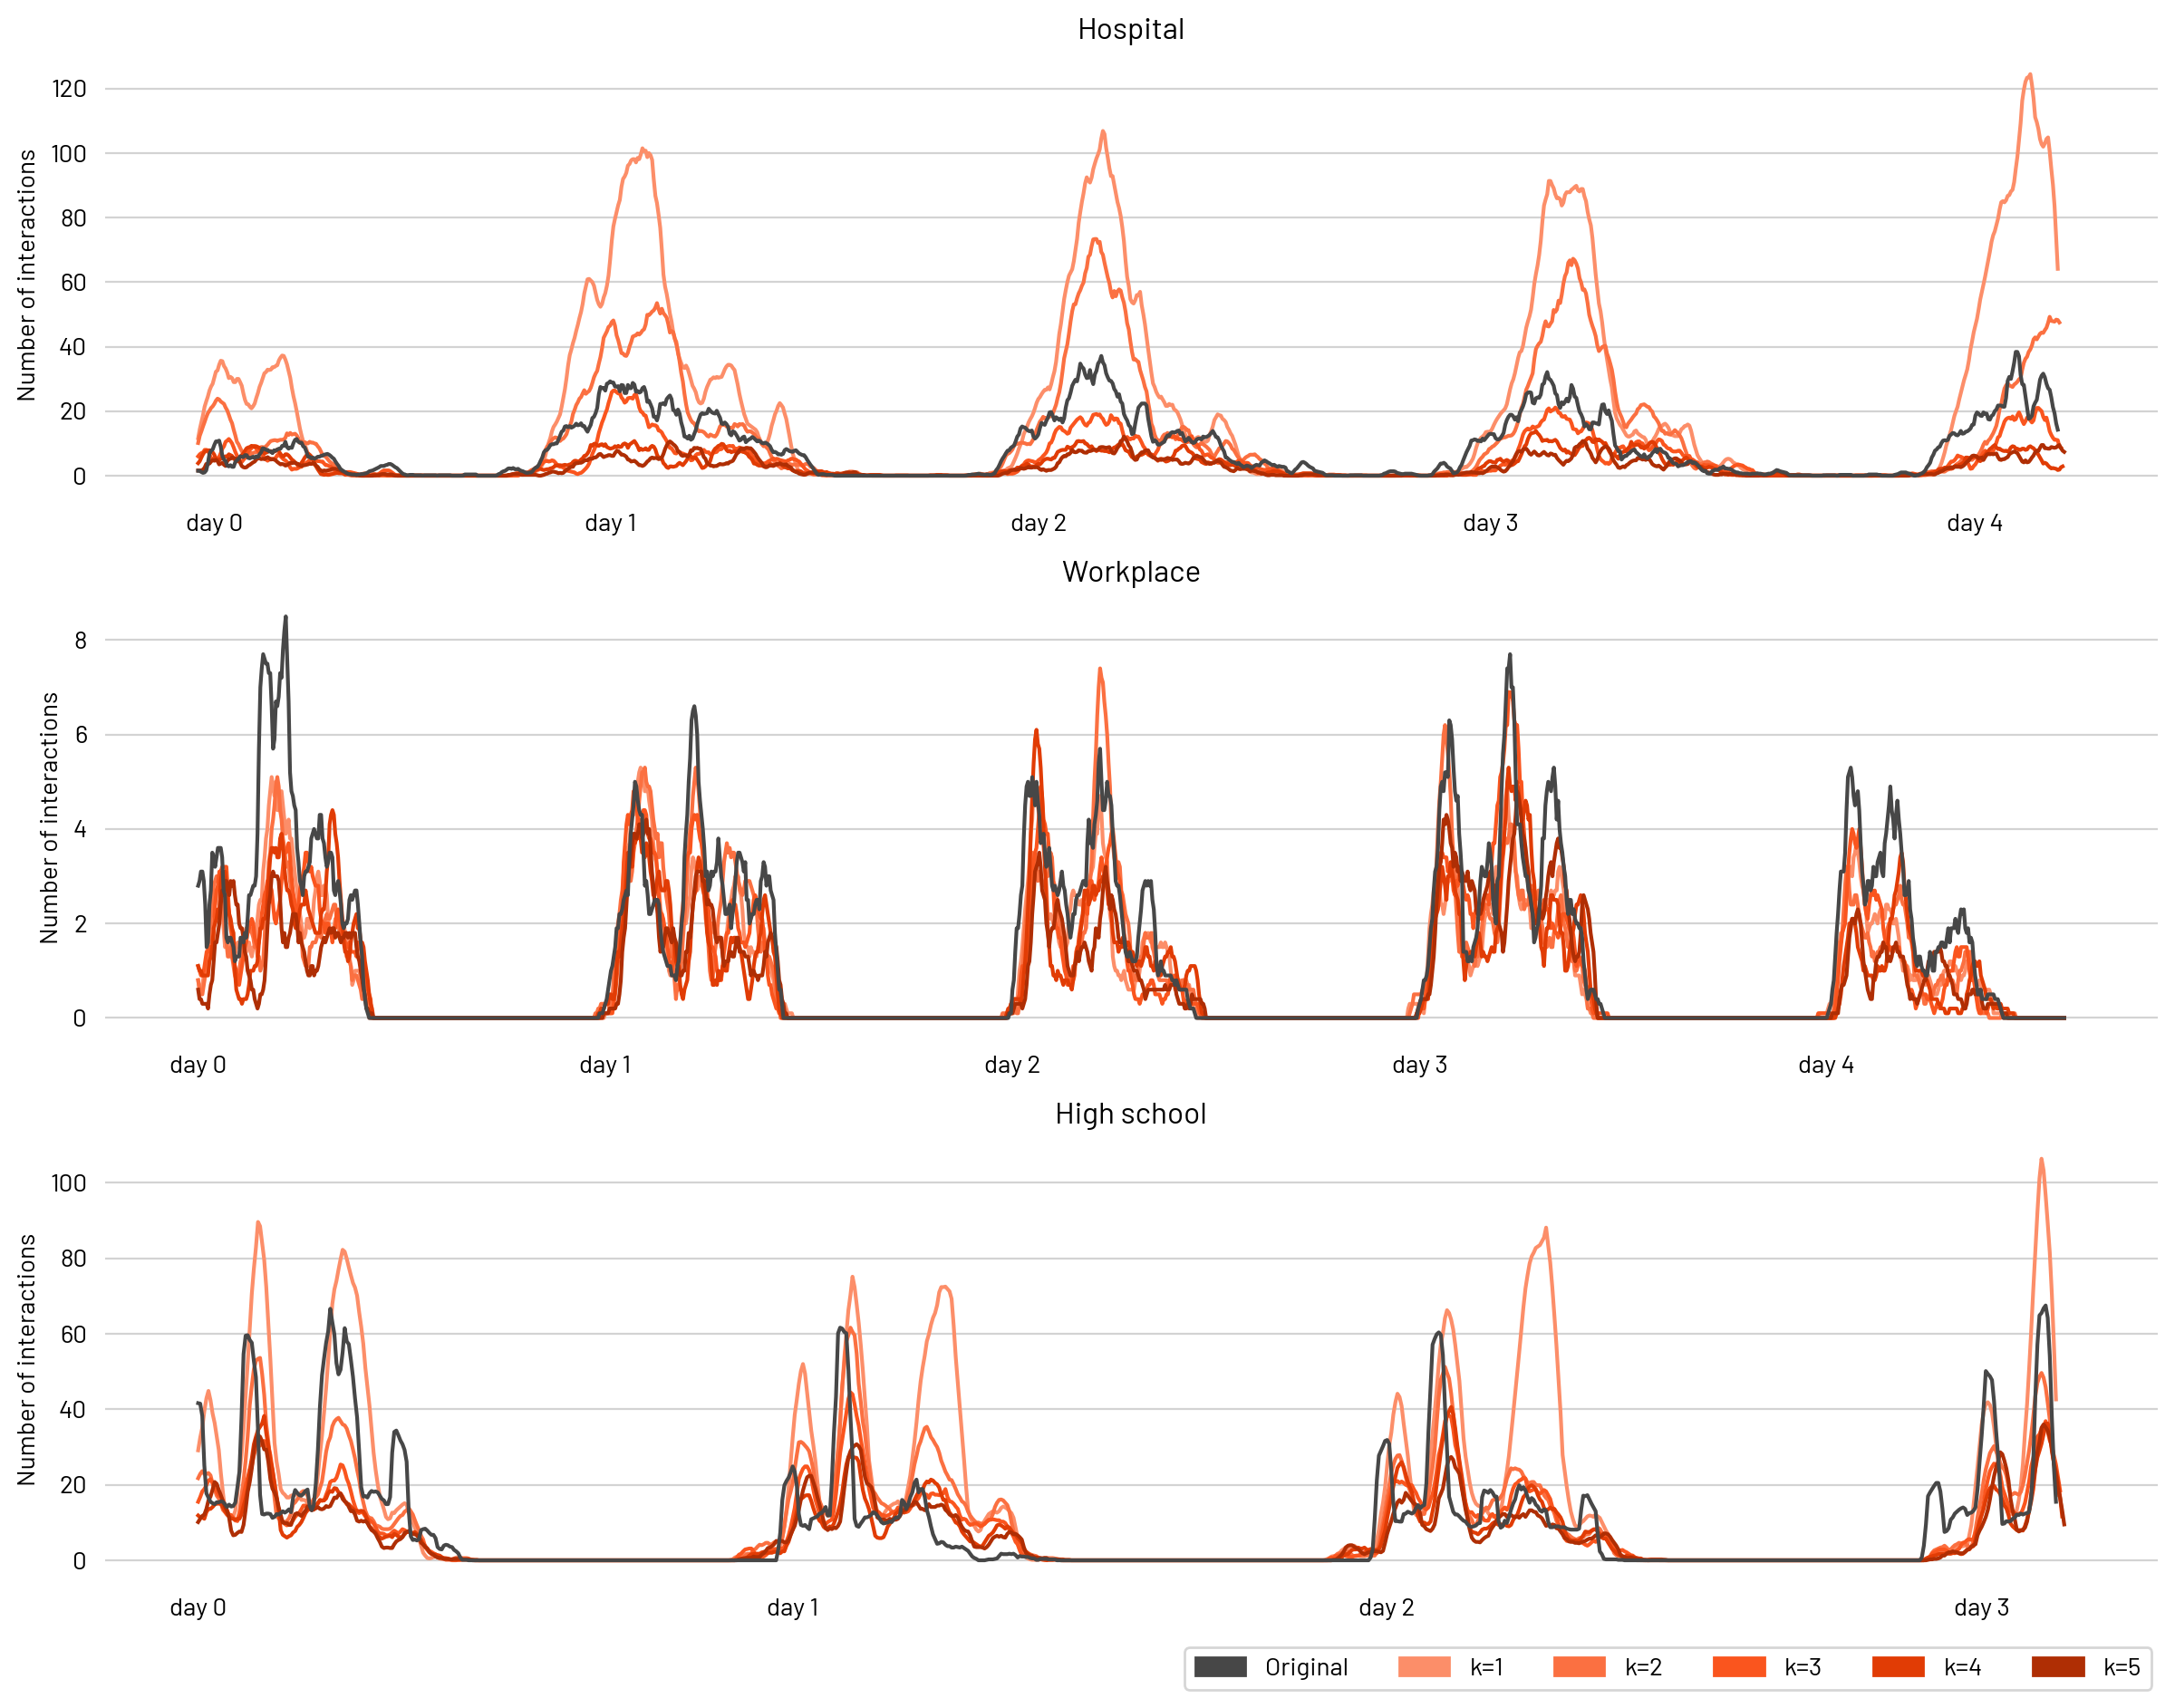

In [129]:


from matplotlib.patches import Patch
from matplotlib.lines import Line2D


figure, ax = plt.subplots(nrows=3, ncols=1,figsize=(12,9))
figure.tight_layout(h_pad=2,w_pad=1)

ax[0].set_title("Hospital")
ax[0].plot(moving_average(nb_interactions(graphs_lh[1])),color="#fc8e69",label="k = 1")
ax[0].plot(moving_average(nb_interactions(graphs_lh[2])),color="#fb7041",label="k = 2")
ax[0].plot(moving_average(nb_interactions(graphs_lh[3])),color="#fa551e",label="k = 3")
ax[0].plot(moving_average(nb_interactions(graphs_lh[4])),color="#e13c05",label="k = 4")
ax[0].plot(moving_average(nb_interactions(graphs_lh[5])),color="#af2e04",label="k = 5")
ax[0].plot(moving_average(nb_interactions(orig_graph_lh)),color=ORIGINAL_COLOR)

w = 10
start = 1330
ax[1].set_title("Workplace")
ax[1].plot(moving_average(nb_interactions(graphs_in[1][:start]),w),color="#fc8e69",label="k = 1")
ax[1].plot(moving_average(nb_interactions(graphs_in[2][:start]),w),color="#fb7041",label="k = 2")
ax[1].plot(moving_average(nb_interactions(graphs_in[3][:start]),w),color="#fa551e",label="k = 3")
ax[1].plot(moving_average(nb_interactions(graphs_in[4][:start]),w),color="#e13c05",label="k = 4")
ax[1].plot(moving_average(nb_interactions(graphs_in[5][:start]),w),color="#af2e04",label="k = 5")
ax[1].plot(moving_average(nb_interactions(orig_graph_in[:start]),w),color=ORIGINAL_COLOR)


ax[2].set_title("High school")
ax[2].plot(moving_average(nb_interactions(graphs_hs[1])),color="#fc8e69",label="k = 1")
ax[2].plot(moving_average(nb_interactions(graphs_hs[2])),color="#fb7041",label="k = 2")
ax[2].plot(moving_average(nb_interactions(graphs_hs[3])),color="#fa551e",label="k = 3")
ax[2].plot(moving_average(nb_interactions(graphs_hs[4])),color="#e13c05",label="k = 4")
ax[2].plot(moving_average(nb_interactions(graphs_hs[5])),color="#af2e04",label="k = 5")
ax[2].plot(moving_average(nb_interactions(orig_graph_hs)),color=ORIGINAL_COLOR)


x = [ 10. , 255, 520, 800, 1100]
ax[0].set_xticks(x,labels=["day 0","day 1","day 2","day 3","day 4"],rotation=0)

#dd = 288
#x = [0,  dd,  dd*2,  dd*3, dd*4, dd*5, dd*6, dd*7, dd*8, dd*9, dd*10,dd*11]
#ax[1].set_xticks(x,labels=["day 0","day 1","day 2","day 3","day 4",
#          "day 5","day 6","day 7","day 8","day 9","day 10","day 11"],rotation=0)

dd = 288
x = [0,  dd,  dd*2,  dd*3, dd*4]
ax[1].set_xticks(x,labels=["day 0","day 1","day 2","day 3","day 4"],rotation=0)

dd = 288
x = [0,  dd,  dd*2,  dd*3]
ax[2].set_xticks(x,labels=["day 0","day 1","day 2","day 3"],rotation=0)

for i in range(3):
    ax[i].tick_params(bottom=False, right=False,left=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    labels = ["Number of nodes"]
    #ax[i].set_xticks(x)
    #ax[i].set_xticklabels(labels,rotation=0)
    ax[i].set_axisbelow(True)
    #ax[i].yaxis.grid(True, color='#FFFFFF')
    #ax[i].set_facecolor('#EFEFEF')
    #ax[i].xaxis.grid(False)

    ax[i].yaxis.grid(True, color='lightgrey')
    #ax.set_facecolor('#EFEFEF')
    ax[i].xaxis.grid(False)

    
    ax[i].set_ylabel("Number of interactions")
    
    
    
#ax[2].legend(loc='center left', bbox_to_anchor=(0.0, -0.3),ncol=6)


legend_elements = [#Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original'),
                   Patch(facecolor=ORIGINAL_COLOR, edgecolor=ORIGINAL_COLOR,label='Original'),
                   Patch(facecolor="#fc8e69", edgecolor="#fc8e69",label='k=1'),
                   Patch(facecolor="#fb7041", edgecolor="#fb7041",label='k=2'),
                   Patch(facecolor="#fa551e", edgecolor="#fa551e",label='k=3'),
                   Patch(facecolor="#e13c05", edgecolor="#e13c05",label='k=4'),
                   Patch(facecolor="#af2e04", edgecolor="#af2e04",label='k=5')]

# Create the figure
ax[2].legend(handles=legend_elements,loc='center left', bbox_to_anchor=(0.52, -0.2),ncol=6)

#figure.savefig("COM_PHY_new_fig/varing_K_nbinteractions_una_sett_invs.pdf", bbox_inches = 'tight')

In [125]:
len(graphs_in[1])

3291

In [120]:
3291/2

1645.5